In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber—corresponds to the record (row) number and has no effect on the output.<br>
CustomerId—contains random values and has no effect on customer leaving the bank.<br>
Surname—the surname of a customer has no impact on their decision to leave the bank.<br>
CreditScore<br>
Geography—a customer’s location can affect their decision to leave the bank.<br>
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.<br>
Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.<br>
Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.<br>
Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.<br>
NumOfProducts—refers to the number of products that a customer has purchased through the bank.<br>
HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.<br>
IsActiveMember—active customers are less likely to leave the bank.<br>
EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.<br>

Exited—whether or not the customer left the bank.

Удалим признаки, которые не влияют на целевую переменную Exited.

In [4]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname'])

In [5]:
df = df.drop_duplicates()
df.shape

(10000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Сильного дисбаланса в категориальных признаках не наблюдается. Переведем эти признаки в бинарные.

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe = OneHotEncoder()
object_columns = df.dtypes[df.dtypes == 'object'].index.values
for column in object_columns:
    column_ohe = ohe.fit_transform(df[[column]]).toarray()
    column_ohe_df = pd.DataFrame(column_ohe, columns = ohe.categories_[0])
    column_ohe_df.index = df.index
    df = df.join(column_ohe_df)

C:\Users\valer\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\valer\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

In [13]:
df = df.drop(columns=object_columns)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


Посмотрим на распределения баланса и заработной платы клиентов.

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\valer\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


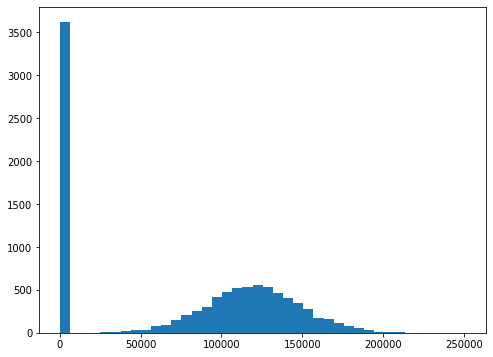

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['Balance'], bins=40)
plt.show()

Здесь было бы хорошо что-то сделать со столбцом нулевого баланса.

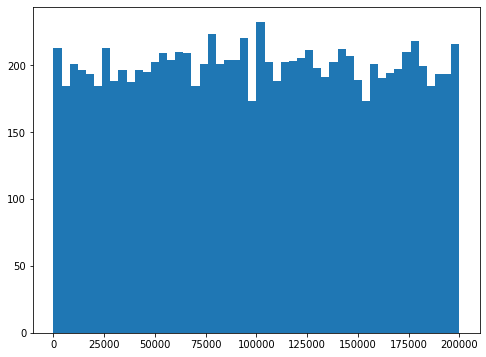

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['EstimatedSalary'], bins=50)
plt.show()

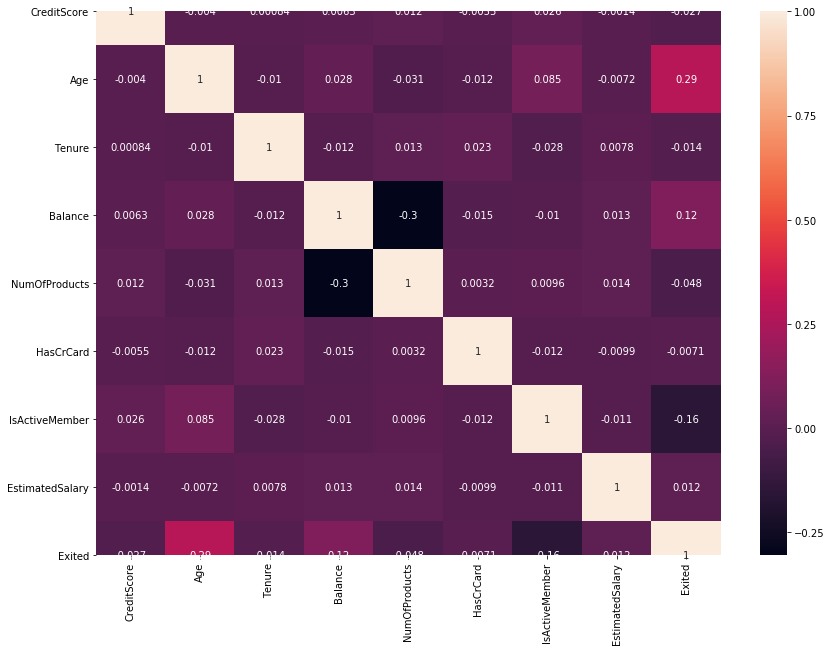

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(df.columns[-5:], axis=1).corr(), annot=True)
plt.show()

Существенно коррелирующих признаков нет.

In [18]:
df.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Присутствует заметный дисбаланс классов.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns=['Exited'], axis=1)
y = df.Exited

X.shape, y.shape

((10000, 13), (10000,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\valer\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\valer\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the rele

((8000, 13), (2000, 13), (8000,), (2000,))

In [22]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

Урежем класс 0 и добавим больше сэмплов класса 1, чтобы их уровнять.

In [23]:
# downsampling

downsampling_counts = int(X_train.shape[0] * 0.4)
downsampling_df = X_train[y_train == 0].sample(downsampling_counts)

# upsampling

upsampling_counts = int(X_train.shape[0] * 0.4)
upsampling_df = X_train[y_train == 1].sample(upsampling_counts, replace=True)

#concat all that

sampling_df = pd.concat([X_train[y_train == 1], downsampling_df])
sampling_df = pd.concat([sampling_df, upsampling_df])
sampling_y_train = y.loc[sampling_df.index].reset_index(drop=True)
sampling_df = sampling_df.reset_index(drop=True)

In [24]:
sampling_y_train.value_counts()

1    4830
0    3200
Name: Exited, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

C:\Users\valer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\valer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [26]:
# без параметров
log_res = LogisticRegression()
log_res.fit(X_train, y_train)

y_pred = log_res.predict(X_test)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(y_test, y_pred))

Weights: [[-3.63122897e-03  1.98097834e-02 -9.21363063e-04  3.74551516e-06
  -2.35386796e-04 -1.11211190e-04 -6.98904652e-04 -7.08887493e-07
  -4.03945297e-04  4.68837774e-04 -1.72665040e-04  4.33328563e-04
  -5.41101126e-04]], Bias: [-0.00010777]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.50      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.65      0.50      0.45      2000
weighted avg       0.74      0.80      0.71      2000



C:\Users\valer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\valer\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [27]:
# с параметрами
log_res = LogisticRegression(penalty='l1', class_weight='balanced', solver='liblinear')
log_res.fit(X_train, y_train)

y_pred = log_res.predict(X_test)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(y_test, y_pred))

Weights: [[-8.79532329e-04  7.95289846e-02 -1.81828767e-02  2.85642897e-06
  -8.10589737e-02 -5.24242247e-02 -8.90583784e-01  7.50848117e-07
  -7.59306519e-01  0.00000000e+00 -7.03605465e-01  0.00000000e+00
  -5.88679595e-01]], Bias: [-1.51848641]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000



C:\Users\valer\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Качество немного выросло за счет обнуления двух признаков $l1$-регуляризацией.

In [28]:
# с сэмплированием
log_res = LogisticRegression(penalty='l1', class_weight='balanced', solver='liblinear')
log_res.fit(sampling_df, sampling_y_train)

y_pred = log_res.predict(X_test)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(y_test, y_pred))

Weights: [[-9.51267589e-04  8.07131663e-02 -2.18671337e-02  2.98728472e-06
  -1.03162749e-01 -9.59350926e-02 -8.15762067e-01  5.50278680e-08
  -6.97331414e-01  0.00000000e+00 -7.71852143e-01  0.00000000e+00
  -5.68454625e-01]], Bias: [-1.42572008]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.72      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.73      2000



C:\Users\valer\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


Качество изменилось несущественно.

In [29]:
from sklearn.model_selection import cross_val_score

logress = LogisticRegression()
results = cross_val_score(logress, X_train, y_train, cv=10, n_jobs=-1)
results

C:\Users\valer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\valer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

array([0.7925 , 0.795  , 0.79625, 0.78875, 0.785  , 0.795  , 0.79125,
       0.8    , 0.79625, 0.79125])

In [30]:
results.std(), results.mean()

(0.004079292218020191, 0.793125)

Модель предсказывает стабильно.